# Perfil de comércio

## Setup

For instructions and how to obtain an API key, see [here](0-comtrade-setup-first.ipynb).

In [1]:
import comtradetools as comtradetools

comtradetools.setup()
APIKEY = comtradetools.get_api_key()
comtradetools.init(APIKEY, force_init=False)

INFO:root:Loading HS codes from support/harmonized-system.csv


## Country and period of interest

Choose country and years of interest

In [2]:
import comtradetools


country_of_interest_name = 'Angola'
country_of_interest = comtradetools.encode_country(country_of_interest_name)

years_of_interest=comtradetools.year_range(2003,2023)
print(country_of_interest_name, years_of_interest)

Angola 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


## Trade balance

In [3]:
import comtradetools
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format

periods = comtradetools.split_period(years_of_interest,6)
global_trade = pd.DataFrame()
for period in periods:
    print(f"Fetching data for period {period}")

    temp = comtradetools.get_trade_flows(country_of_interest, 
                                                   period=period,
                                                   symmetric_values=True)
                         
    global_trade = pd.concat([global_trade,temp])


global_trade = global_trade.replace(0, np.nan)
cols_of_interest = global_trade.columns



INFO:root:Calling getFinalData for period 2003,2004,2005,2006,2007,2008
INFO:root:Using cached results for period 2003,2004,2005,2006,2007,2008
INFO:root:Calling getFinalData for period 2003,2004,2005,2006,2007,2008
INFO:root:Using cached results for period 2003,2004,2005,2006,2007,2008
INFO:root:Calling getFinalData for period 2003,2004,2005,2006,2007,2008
INFO:root:Using cached results for period 2003,2004,2005,2006,2007,2008
INFO:root:Calling getFinalData for period 2003,2004,2005,2006,2007,2008
INFO:root:Using cached results for period 2003,2004,2005,2006,2007,2008
INFO:root:Calling getFinalData for period 2009,2010,2011,2012,2013,2014
INFO:root:Using cached results for period 2009,2010,2011,2012,2013,2014
INFO:root:Calling getFinalData for period 2009,2010,2011,2012,2013,2014
INFO:root:Using cached results for period 2009,2010,2011,2012,2013,2014
INFO:root:Calling getFinalData for period 2009,2010,2011,2012,2013,2014
INFO:root:Using cached results for period 2009,2010,2011,2012,20

Fetching data for period 2003,2004,2005,2006,2007,2008
Fetching data for period 2009,2010,2011,2012,2013,2014
Fetching data for period 2015,2016,2017,2018,2019,2020
Fetching data for period 2021,2022,2023


INFO:root:Calling getFinalData for period 2021,2022,2023


In [4]:
global_trade['varM_perc']=global_trade['M']/global_trade['M<X']
global_trade['varX_perc']=global_trade['X']/global_trade['X<M']
global_trade


flowCode,M,M<X,X,X<M,trade_balance (X-M),trade_balance (X<M-M),trade_volume (X+M),trade_volume (X<M+M),varM_perc,varX_perc
period,,,,,,,,,,
2003,NaN,"4,431,063,866.32",NaN,"9,322,134,085.35",NaN,"9,322,134,085.35",NaN,"9,322,134,085.35",NaN,NaN
2004,NaN,"6,674,895,546.08",NaN,"12,774,807,491.45",NaN,"12,774,807,491.45",NaN,"12,774,807,491.45",NaN,NaN
2005,NaN,"7,767,184,001.86",NaN,"22,086,367,001.78",NaN,"22,086,367,001.78",NaN,"22,086,367,001.78",NaN,NaN
2006,NaN,"10,636,294,703.97",NaN,"32,047,827,417.37",NaN,"32,047,827,417.37",NaN,"32,047,827,417.37",NaN,NaN
2007,"11,094,843,413.00","12,662,439,392.45","44,177,783,071.00","41,711,887,538.55","33,082,939,658.00","30,617,044,125.55","55,272,626,484.00","52,806,730,951.55",0.88,1.06
2008,NaN,"20,453,079,573.81",NaN,"67,748,979,650.35",NaN,"67,748,979,650.35",NaN,"67,748,979,650.35",NaN,NaN
2009,"23,918,854,361.00","17,838,411,060.41","40,639,411,732.00","39,936,869,385.44","16,720,557,371.00","16,018,015,024.44","64,558,266,093.00","63,855,723,746.44",1.34,1.02
2010,"18,143,268,908.00","15,871,622,642.40","52,612,114,761.00","53,459,185,324.68","34,468,845,853.00","35,315,916,416.68","70,755,383,669.00","71,602,454,232.68",1.14,0.98
2011,"20,790,996,039.00","18,520,760,698.38","66,427,390,220.00","66,204,920,204.59","45,636,394,181.00","45,413,924,165.59","87,218,386,259.00","86,995,916,243.59",1.12,1.00


In [5]:
start_year=global_trade.index.min()
end_year=global_trade.index.max()
excel_file = f"reports/{country_of_interest_name}_trade_balance_{start_year}-{end_year}.xlsx"
global_trade.to_excel(excel_file)

0 Line2D(M) 0.0
1 Line2D(M<X) 0.8
2 Line2D(X) 0.0
3 Line2D(X<M) 0.8
4 Line2D(trade_balance (X-M)) 0.0
5 Line2D(trade_balance (X<M-M)) 0.8
6 Line2D(trade_volume (X+M)) 0.0
7 Line2D(trade_volume (X<M+M)) 0.8


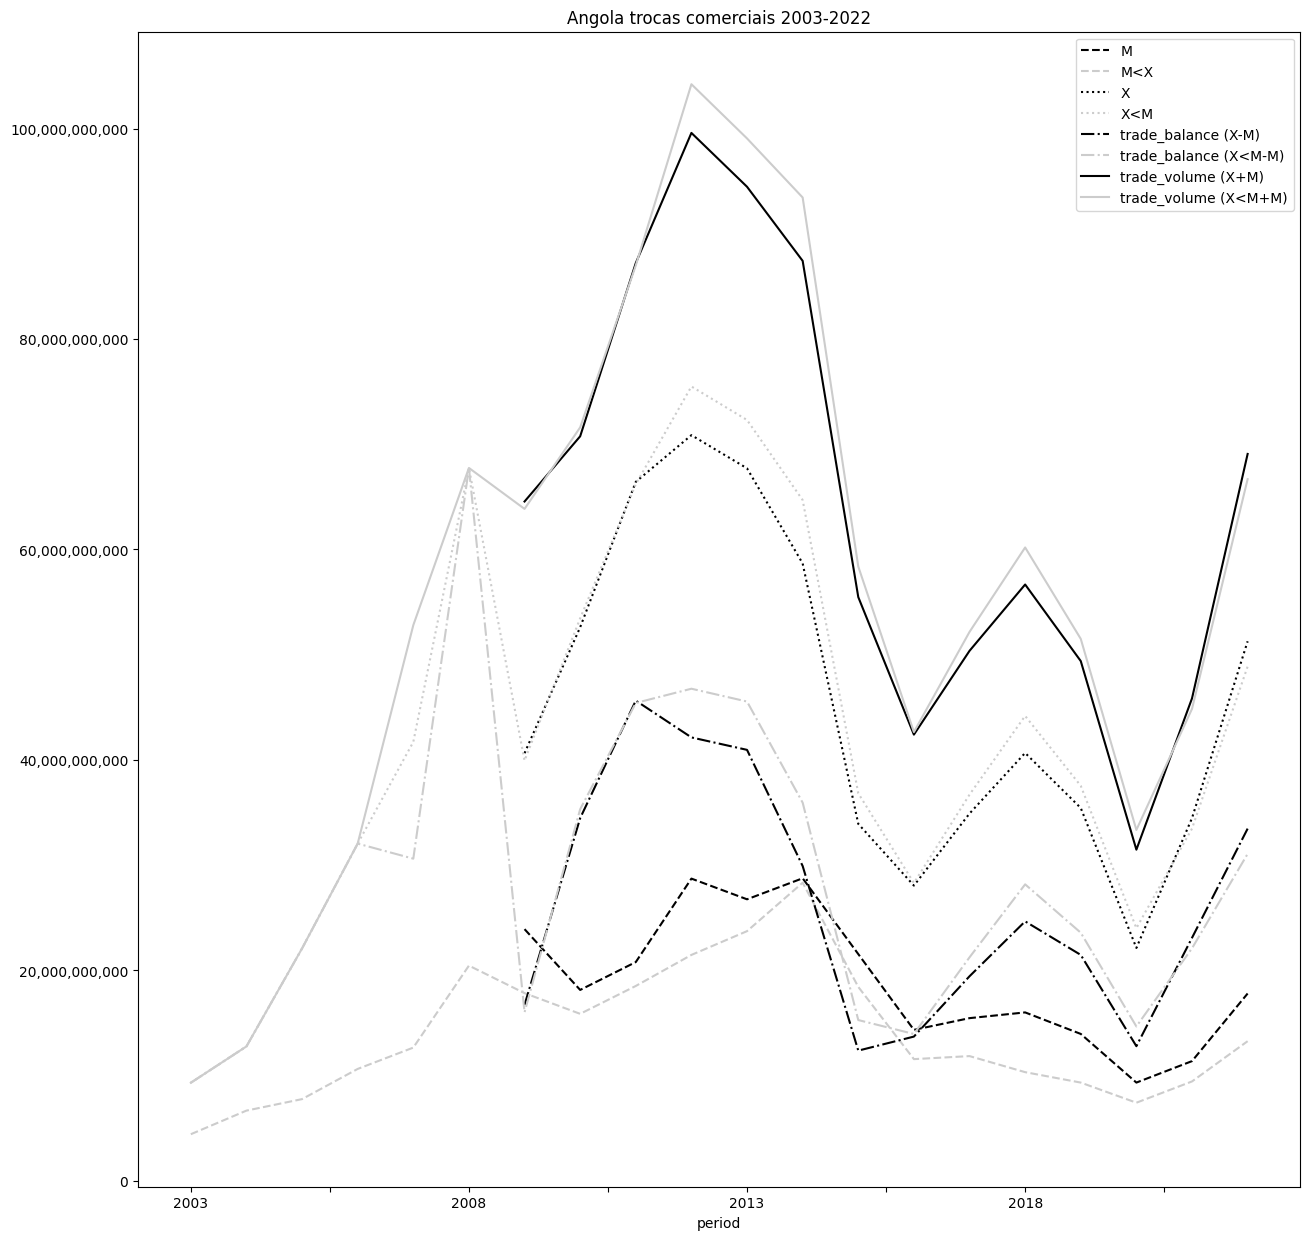

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

start_year=global_trade.index.min()
end_year=global_trade.index.max()
title=f"{country_of_interest_name} trocas comerciais {start_year}-{end_year}"
plotfile = f"reports/{country_of_interest_name}_trade_balance_{start_year}-{end_year}.png"
fig = global_trade[cols_of_interest].plot.line(figsize=(15,15),title=title)

# use a grayscale palette of colors
colors = ['0.0','0.8','0.0','0.8','0.0','0.8','0.0','0.8']

# use different line styles and black lines
linestyles = ['dashed', 'dashed', 'dotted', 'dotted', 'dashdot', 'dashdot', 'solid', 'solid']
for i, line in enumerate(fig.get_lines()):
    print(i, line, colors[i])
    line.set_color(colors[i])
    line.set_linestyle(linestyles[i % len(linestyles)])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig.yaxis.set_major_formatter(formatter)
fig.legend(list(global_trade.columns.astype(str)))

plt.savefig(plotfile)
plt.show()

## Exports

Usamos as importações declaradas pelos parceiros para obter as
exportações do país de interesse.

### Main export partners of the country

In [52]:

# If symmetric_reporting is ture we get the exports from 
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world 
#    for import data from Country of Interest

symmetric_reporting = True  # set to false to use reported exports by CoI
if symmetric_reporting:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'
else:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'

# Or we can take declared exports by Country of Interest
reporterCode, partnerCode, flowCode, reporter = country_of_interest, None,'X', 'reporter'

# years_of_interest = comtrade.year_range(2020, 2021)  
df = comtradetools.getFinalData(APIKEY,
                                reporterCode=reporterCode,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode=flowCode,
                                period=years_of_interest,
                                partnerCode=partnerCode,
                                remove_world=True,
                                partner2Code=0,  # world
                                clCode="HS",
                                cmdCode="TOTAL",
                                motCode=0,  # all means of transport
                                customsCode='C00', # all customs
                                includeDesc=True,        
                                cache=True             
                                )

INFO:root:Calling getFinalData for period 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
INFO:root:Calling getFinalData for period 2015,2016,2017,2018,2019,2020,2021,2022,2023


Ha um bug quando se usa a cache

In [53]:
df.refYear.unique()

array([2007, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022])

In [54]:
pd.options.display.max_columns = 60

df[(df.refYear==2015)].head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,flowDesc,partnerCode,partnerISO,partnerDesc,partner2Code,partner2ISO,partner2Desc,classificationCode,classificationSearchCode,isOriginalClassification,cmdCode,cmdDesc,aggrLevel,isLeaf,customsCode,customsDesc,mosCode,motCode,motDesc,qtyUnitCode,qtyUnitAbbr,qty,isQtyEstimated,altQtyUnitCode,altQtyUnitAbbr,altQty,isAltQtyEstimated,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
244,C,A,20150101,2015,52,2015,24,AGO,Angola,X,Export,4,AFG,Afghanistan,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,N/A,0.00,False,-1,N/A,0.00,False,NaN,False,NaN,False,None,"39,585.79","39,585.79",0,False,True
245,C,A,20150101,2015,52,2015,24,AGO,Angola,X,Export,8,ALB,Albania,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,N/A,0.00,False,-1,N/A,0.00,False,NaN,False,NaN,False,None,"2,259.13","2,259.13",0,False,True
246,C,A,20150101,2015,52,2015,24,AGO,Angola,X,Export,12,DZA,Algeria,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,N/A,0.00,False,-1,N/A,0.00,False,NaN,False,NaN,False,None,"2,322,462.72","2,322,462.72",0,False,True
247,C,A,20150101,2015,52,2015,24,AGO,Angola,X,Export,28,ATG,Antigua and Barbuda,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,N/A,0.00,False,-1,N/A,0.00,False,NaN,False,NaN,False,None,"155,467.39","155,467.39",0,False,True
248,C,A,20150101,2015,52,2015,24,AGO,Angola,X,Export,31,AZE,Azerbaijan,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,N/A,0.00,False,-1,N/A,0.00,False,NaN,False,NaN,False,None,"9,926.12","9,926.12",0,False,True


In [55]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5 

# aggregate by year, flow, reporter 
exports = comtradetools.total_rank_perc(df,groupby=['refYear','flowCode',f'{partner_column}Desc'],
                                   col='primaryValue',
                                   prefix='partner',
                                   drop_duplicates=True)

cols=['refYear','flowCode',f'{partner_column}Desc','cmdCode','partner_upper_sum','partner_sum','partner_rank','partner_perc','partner_upper_perc']

formats =  comtradetools.make_format(cols)

top_export_partners = exports[exports['partner_rank']<=show_only_top][f'{partner_column}Desc'].unique()
top_export_partners_codes = exports[exports['partner_rank']<=show_only_top][f'{partner_column}Code'].unique()

print(f"Top {show_only_top} export partners of {country_of_interest_name} in {years_of_interest}: \n{top_export_partners}")
exports[exports['partner_rank']<=show_only_top][cols].sort_values(['refYear','flowCode','partner_rank',f'{partner_column}Desc','cmdCode']).style.format(formats)

Top 5 export partners of Angola in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023: 
['Canada' 'China' 'France' 'India' 'USA' 'Other Asia, nes' 'Italy' 'Spain'
 'South Africa' 'Portugal' 'United Arab Emirates' 'Thailand' 'Singapore'
 'Netherlands']


,refYear,flowCode,partnerDesc,cmdCode,partner_upper_sum,partner_sum,partner_rank,partner_perc,partner_upper_perc
5,2007,X,China,TOTAL,"$44,177,783,072","$13,459,326,563",1,30.466%,30.466%
32,2007,X,USA,TOTAL,"$44,177,783,072","$10,875,646,624",2,24.618%,24.618%
3,2007,X,Canada,TOTAL,"$44,177,783,072","$2,913,186,035",3,6.594%,6.594%
10,2007,X,France,TOTAL,"$44,177,783,072","$2,592,972,627",4,5.869%,5.869%
25,2007,X,India,TOTAL,"$44,177,783,072","$2,376,843,352",5,5.380%,5.380%
41,2009,X,China,TOTAL,"$40,639,411,730","$15,954,060,922",1,39.258%,39.258%
65,2009,X,USA,TOTAL,"$40,639,411,730","$7,708,378,359",2,18.968%,18.968%
58,2009,X,India,TOTAL,"$40,639,411,730","$3,659,557,185",3,9.005%,9.005%
43,2009,X,France,TOTAL,"$40,639,411,730","$3,030,206,205",4,7.456%,7.456%
38,2009,X,Canada,TOTAL,"$40,639,411,730","$2,324,861,006",5,5.721%,5.721%


Passamos os países para colunas, mantendo a percentagem e o valor em separado.

In [10]:
pivoted = df.pivot_table(index=['refYear','flowDesc'], columns=f'{partner_column}Desc', values=['primaryValue','partner_perc'])
pivoted.swaplevel(axis=1).fillna('',inplace=True)
pivoted.sort_index(axis=1, level=0, inplace=True)
pivoted.fillna(0)

partner_perc                                         \
partnerDesc        Areas, nes Australia Bahamas Belgium Benin Brazil   
refYear flowDesc                                                       
2007    Export           0.03      0.00    0.00    0.00  0.00   0.02   
2009    Export           0.02      0.00    0.00    0.00  0.00   0.00   
2010    Export           0.01      0.00    0.00    0.00  0.00   0.01   
2011    Export           0.00      0.00    0.00    0.00  0.00   0.01   
2012    Export           0.00      0.00    0.00    0.00  0.00   0.00   
2013    Export           0.00      0.00    0.00    0.00  0.00   0.01   
2014    Export           0.00      0.00    0.00    0.00  0.00   0.02   

                                                                              \
partnerDesc      Cabo Verde Cameroon Canada Chile China China, Hong Kong SAR   
refYear flowDesc                                                               
2007    Export         0.00     0.00   0.07  0.02  0.30                 0.00   
2009    Export         0.00     0.00   0.06  0.00  0.39                 0.00   
2010    Export         0.00     0.00   0.08  0.00  0.40                 0.00   
2011    Export         0.00     0.00   0.00  0.00  0.37                 0.00   
2012    Export         0.00     0.00   0.05  0.00  0.48                 0.00   
2013    Export         0.00     0.00   0.05  0.00  0.47                 0.00   
2014    Export         0.00     0.00   0.05  0.01  0.47                 0.00   

                                                                             \
partnerDesc      Colombia Congo Cyprus Côte d'Ivoire Dem. Rep. of the Congo   
refYear flowDesc                                                              
2007    Export       0.00  0.00   0.00          0.00                   0.00   
2009    Export       0.00  0.00   0.00          0.00                   0.00   
2010    Export       0.00  0.00   0.00          0.00                   0.00   
2011    Export       0.00  0.00   0.00          0.00                   0.00   
2012    Export       0.00  0.00   0.00          0.00                   0.00   
2013    Export       0.00  0.00   0.00          0.00                   0.00   
2014    Export       0.00  0.00   0.00          0.00                   0.00   

                                                                              \
partnerDesc      Ecuador France Germany Ghana Guinea India Indonesia Ireland   
refYear flowDesc                                                               
2007    Export      0.00   0.06    0.00  0.00   0.00  0.05      0.00    0.00   
2009    Export      0.00   0.07    0.00  0.00   0.00  0.09      0.00    0.00   
2010    Export      0.00   0.04    0.00  0.00   0.00  0.10      0.00    0.00   
2011    Export      0.00   0.03    0.00  0.00   0.00  0.10      0.00    0.00   
2012    Export      0.00   0.02    0.00  0.00   0.00  0.10      0.00    0.00   
2013    Export      0.00   0.02    0.00  0.00   0.00  0.10      0.00    0.00   
2014    Export      0.00   0.03    0.00  0.00   0.00  0.08      0.00    0.00   

                                                     ...     primaryValue  \
partnerDesc      Israel Italy Japan Malaysia Mexico  ...            Italy   
refYear flowDesc                                     ...                    
2007    Export     0.00  0.01  0.00     0.00   0.00  ...   324,796,391.00   
2009    Export     0.01  0.00  0.00     0.00   0.00  ...        98,577.00   
2010    Export     0.01  0.00  0.00     0.00   0.00  ...   219,933,498.00   
2011    Export     0.01  0.03  0.00     0.00   0.00  ... 2,270,211,034.00   
2012    Export     0.00  0.02  0.00     0.00   0.00  ... 1,090,068,047.00   
2013    Export     0.00  0.02  0.01     0.00   0.00  ... 1,029,414,240.00   
2014    Export     0.00  0.02  0.01     0.00   0.00  ... 1,347,847,024.00   

                                                                            \
partnerDesc               Japan       Malaysia        

In [11]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_export_partners]
pivoted[show_only_columns]

partner_perc                                                 \
partnerDesc            Canada China France India Italy Other Asia, nes Spain   
refYear flowDesc                                                               
2007    Export           0.07  0.30   0.06  0.05  0.01            0.04  0.02   
2009    Export           0.06  0.39   0.07  0.09  0.00            0.03  0.02   
2010    Export           0.08  0.40   0.04  0.10  0.00            0.05  0.02   
2011    Export            NaN  0.37   0.03  0.10  0.03            0.08  0.01   
2012    Export           0.05  0.48   0.02  0.10  0.02            0.07  0.02   
2013    Export           0.05  0.47   0.02  0.10  0.02            0.06  0.04   
2014    Export           0.05  0.47   0.03  0.08  0.02            0.04  0.06   

                          primaryValue                                     \
partnerDesc       USA           Canada             China           France   
refYear flowDesc                                                            
2007    Export   0.25 2,913,186,035.00 13,459,326,563.00 2,592,972,627.00   
2009    Export   0.19 2,324,861,006.00 15,954,060,922.00 3,030,206,205.00   
2010    Export   0.19 4,039,116,578.00 20,963,245,476.00 2,213,064,563.00   
2011    Export   0.25              NaN 24,360,792,847.00 2,187,026,178.00   
2012    Export   0.09 3,519,981,595.00 33,710,030,023.00 1,176,722,960.00   
2013    Export   0.07 3,305,027,169.00 31,947,235,081.00 1,374,449,816.00   
2014    Export   0.04 2,719,654,992.00 27,527,110,851.00 1,929,812,984.00   

                                                                     \
partnerDesc                 India            Italy  Other Asia, nes   
refYear flowDesc                                                      
2007    Export   2,376,843,352.00   324,796,391.00 1,913,906,941.00   
2009    Export   3,659,557,185.00        98,577.00 1,154,653,223.00   
2010    Export   5,117,824,926.00   219,933,498.00 2,699,439,575.00   
2011    Export   6,842,018,300.00 2,270,211,034.00 5,386,493,281.00   
2012    Export   6,932,060,800.00 1,090,068,047.00 4,699,797,618.00   
2013    Export   6,764,232,765.00 1,029,414,240.00 4,007,020,057.00   
2014    Export   4,507,416,181.00 1,347,847,024.00 2,329,013,301.00   

                                                     
partnerDesc                 Spain               USA  
refYear flowDesc                                     
2007    Export     777,102,267.00 10,875,646,624.00  
2009    Export     740,116,751.00  7,708,378,359.00  
2010    Export     973,507,488.00  9,965,785,888.00  
2011    Export     650,112,757.00 16,475,024,144.00  
2012    Export   1,627,704,793.00  6,594,525,851.00  
2013    Export   2,481,785,160.00  5,018,390,939.00  
2014    Export   3,726,455,174.00  2,548,807,590.00

In [12]:
import pandas as pd

# lets get just the value of imports from the top export partners
values_only = pivoted.loc[:,"primaryValue"]
values_only.reset_index(level=1, drop=True, inplace=True)
show_only_columns = [country for country in values_only.columns.tolist() if country in top_export_partners]
values_only=values_only[show_only_columns]
# sort columns by mean value
mean_values = values_only.mean().sort_values(ascending=False)
values_only = values_only[mean_values.index]
values_only

partnerDesc,China,USA,India,"Other Asia, nes",Canada,France,Spain,Italy
refYear,,,,,,,,
2007,"13,459,326,563.00","10,875,646,624.00","2,376,843,352.00","1,913,906,941.00","2,913,186,035.00","2,592,972,627.00","777,102,267.00","324,796,391.00"
2009,"15,954,060,922.00","7,708,378,359.00","3,659,557,185.00","1,154,653,223.00","2,324,861,006.00","3,030,206,205.00","740,116,751.00","98,577.00"
2010,"20,963,245,476.00","9,965,785,888.00","5,117,824,926.00","2,699,439,575.00","4,039,116,578.00","2,213,064,563.00","973,507,488.00","219,933,498.00"
2011,"24,360,792,847.00","16,475,024,144.00","6,842,018,300.00","5,386,493,281.00",NaN,"2,187,026,178.00","650,112,757.00","2,270,211,034.00"
2012,"33,710,030,023.00","6,594,525,851.00","6,932,060,800.00","4,699,797,618.00","3,519,981,595.00","1,176,722,960.00","1,627,704,793.00","1,090,068,047.00"
2013,"31,947,235,081.00","5,018,390,939.00","6,764,232,765.00","4,007,020,057.00","3,305,027,169.00","1,374,449,816.00","2,481,785,160.00","1,029,414,240.00"
2014,"27,527,110,851.00","2,548,807,590.00","4,507,416,181.00","2,329,013,301.00","2,719,654,992.00","1,929,812,984.00","3,726,455,174.00","1,347,847,024.00"


0 Line2D(_child0) red
1 Line2D(_child2) lightsalmon
2 Line2D(_child4) green
3 Line2D(_child6) lightgreen
4 Line2D(_child8) darkviolet
5 Line2D(_child10) violet
6 Line2D(_child12) blue
7 Line2D(_child14) dodgerblue


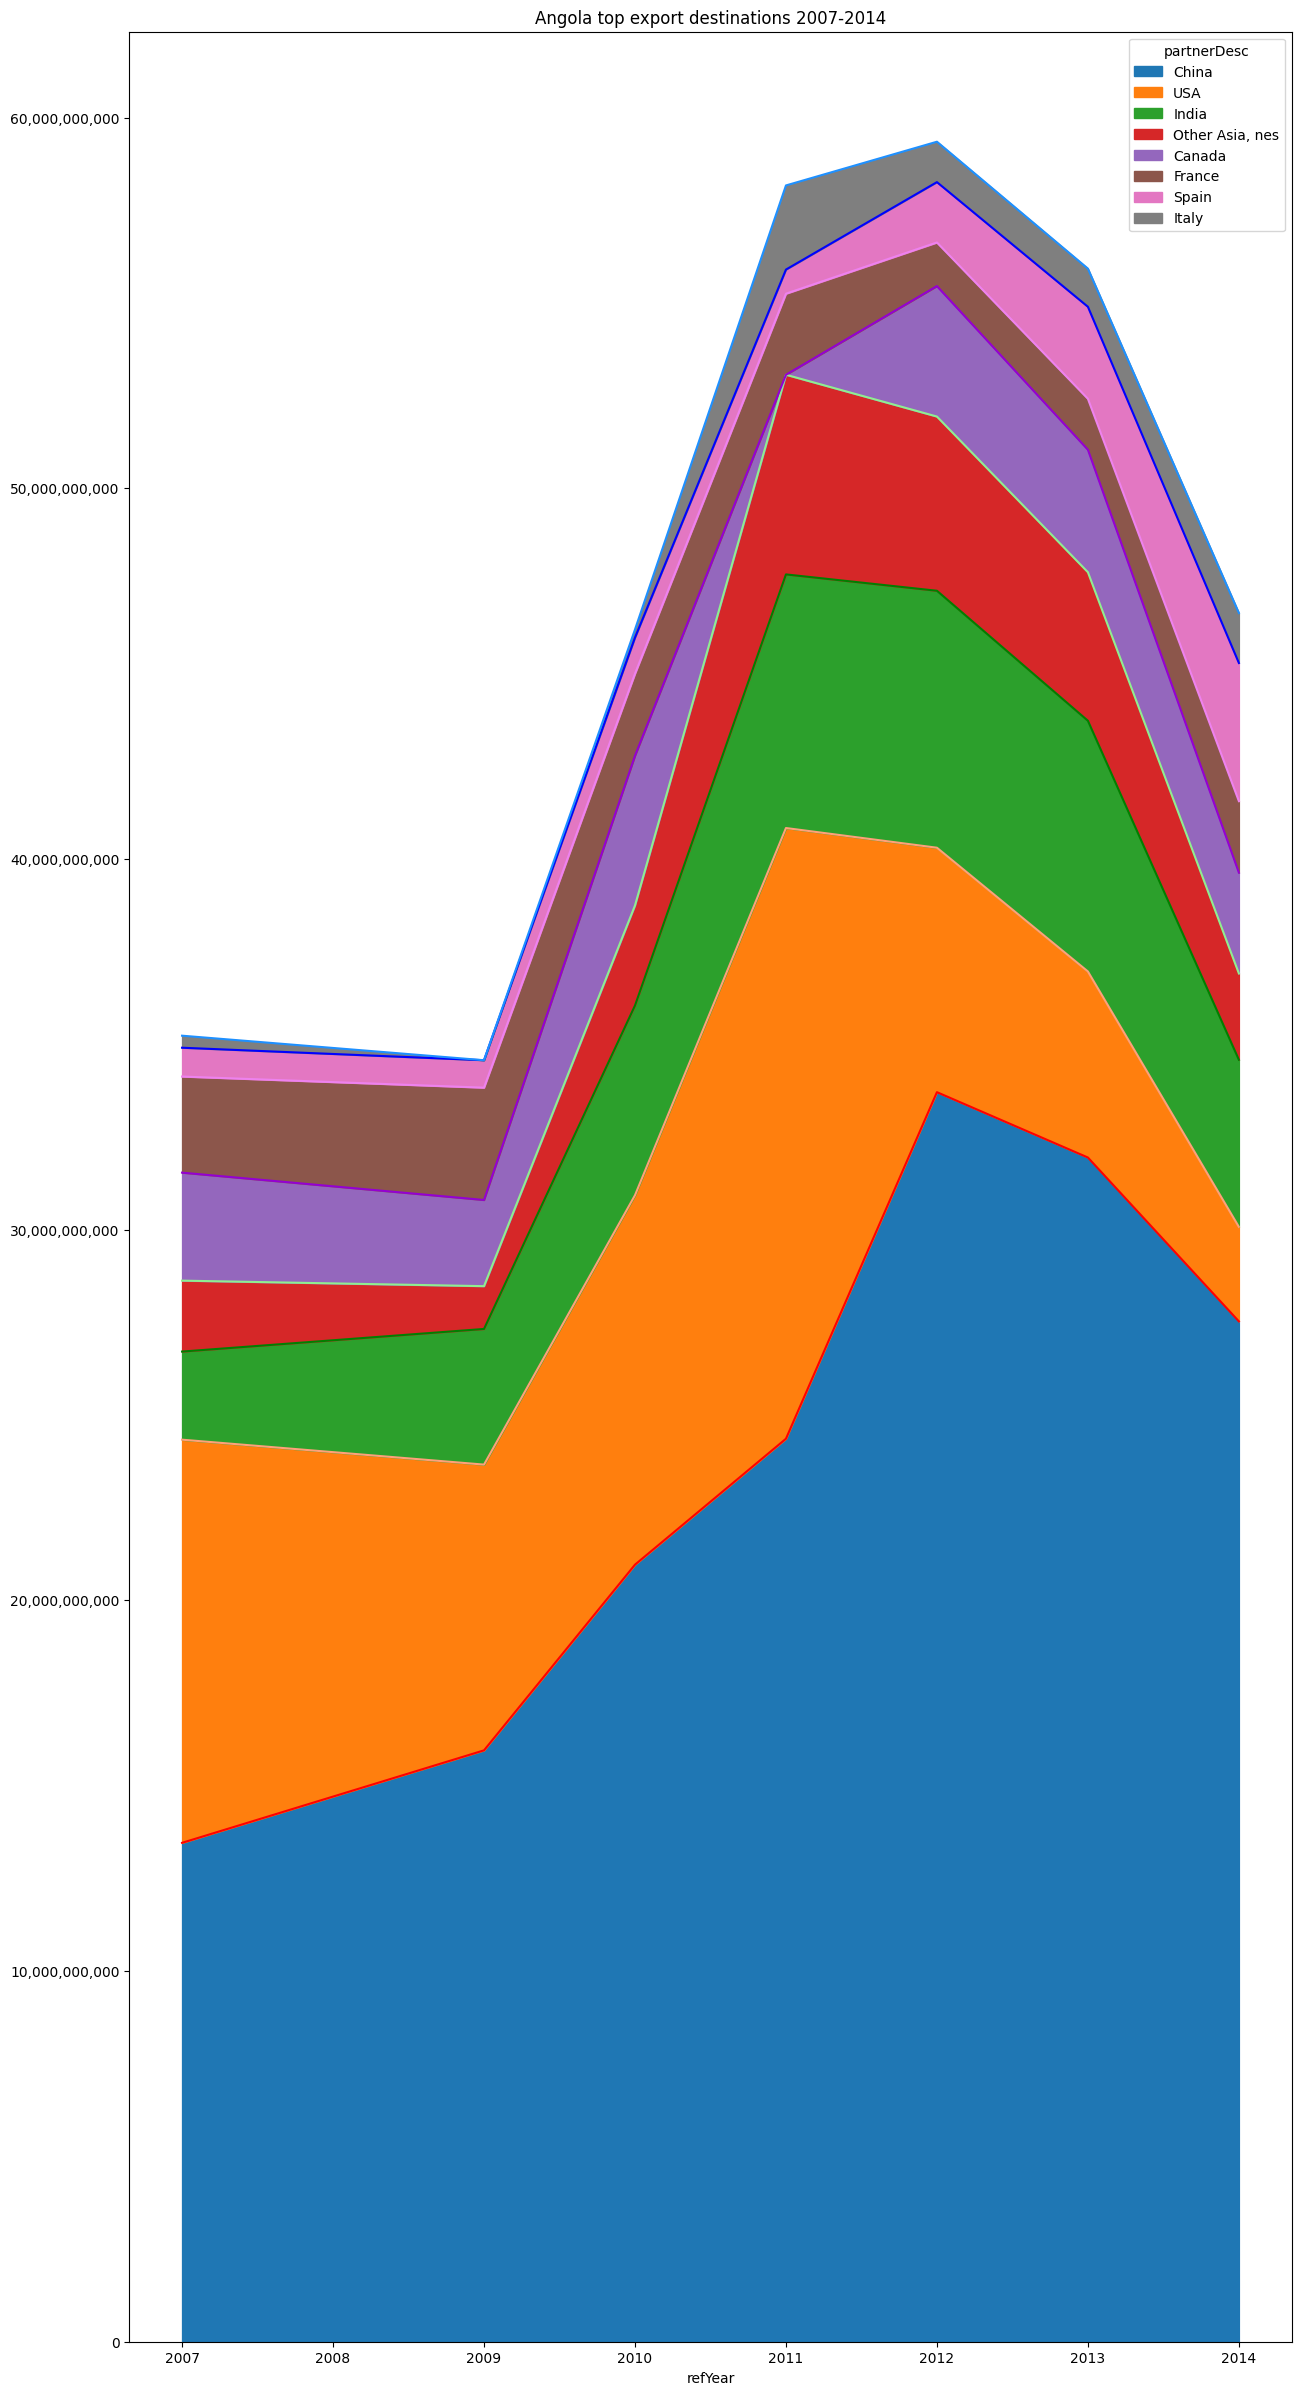

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

start_year=values_only.index.min()
end_year=values_only.index.max()
title=f"{country_of_interest_name} top export destinations {start_year}-{end_year}"
plotfile = f"reports/{country_of_interest_name}_export_partners_{start_year}-{end_year}.png"
fig2 = values_only.plot.area(figsize=(15,30),title=title)
# see https://matplotlib.org/stable/gallery/color/named_colors.html
colors = ['red','lightsalmon','green','lightgreen','darkviolet','violet','blue','dodgerblue',
            'orange','yellow','brown','black','grey','pink','cyan','magenta',]
# colors = ['crimson', 'darkorange', 'gold', 'limegreen', 'mediumseagreen', 'teal', 'deepskyblue', 'royalblue', 'indigo', 'mediumvioletred', 'hotpink', 'saddlebrown', 'grey', 'black', 'darkslategrey', 'darkkhaki']
for i, line in enumerate(fig2.get_lines()):
    n = i % len(colors)
    print(i, line, colors[n])
    line.set_color(colors[n])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig2.yaxis.set_major_formatter(formatter)


plt.show()
plt.savefig(plotfile)

In [14]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_export_partners]
show_only_columns

[('partner_perc', 'Canada'),
 ('partner_perc', 'China'),
 ('partner_perc', 'France'),
 ('partner_perc', 'India'),
 ('partner_perc', 'Italy'),
 ('partner_perc', 'Other Asia, nes'),
 ('partner_perc', 'Spain'),
 ('partner_perc', 'USA'),
 ('primaryValue', 'Canada'),
 ('primaryValue', 'China'),
 ('primaryValue', 'France'),
 ('primaryValue', 'India'),
 ('primaryValue', 'Italy'),
 ('primaryValue', 'Other Asia, nes'),
 ('primaryValue', 'Spain'),
 ('primaryValue', 'USA')]

#### Export to Excel

In [15]:
exports.to_excel(f'reports/{country_of_interest_name}_top_partners.xlsx')
pivoted.to_excel(f'reports/{country_of_interest_name}_top_partners_cols.xlsx')
pivoted[show_only_columns].to_excel(f'reports/{country_of_interest_name}_export_top_{show_only_top}_partners_{start_year}-{end_year}.xlsx')

## Exports: products

### Main exported products

In [17]:
import pandas as pd

# show 500 lines of dataframes
pd.set_option('display.max_rows', 500)

show_only_top=5
# years_of_interest = comtrade.year_range(2020, 2021)  


Get the products imported from Angola

In [59]:
clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=country_of_interest,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        partnerCode=0,
                        remove_world=False,
                        partner2Code=0,
                        period=years_of_interest,
                        period_size=6,
                        clCode=clCode,
                        cmdCode=cmdDetail,  
                        motCode=0,  # all means of transport
                        flowCode='X',
                        customsCode='C00',
                        includeDesc=True,
                        cache=True   
                        )

INFO:root:Calling getFinalData for period 2003,2004,2005,2006,2007,2008


In [58]:
df[(df['refYear'].isin([2007, 2015, 2021])) & (df['cmdCode'].str.startswith('27'))][['refYear','cmdCode','cmdDesc','primaryValue']] #.sort_values(['refYear','primaryValue'],ascending=[True,False])

,refYear,cmdCode,cmdDesc,primaryValue


In [42]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5 
exports = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode'],'primaryValue','product',drop_duplicates=True)
exports = exports[exports['product_rank']<=show_only_top]

cols=['refYear','flowCode','cmdCode','product_sum','product_rank','product_perc','product_upper_sum', 'cmdDesc']
formats =  comtradetools.make_format(cols)

top_export_products_codes = exports['cmdCode'].unique()

print(f"Top products exported by {country_of_interest_name} in {years_of_interest}:\n {top_export_products_codes}")
for cmdCode in top_export_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")
exports[cols].sort_values(['refYear','flowCode','product_rank']).style.format(formats)


Top products exported by Angola in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023:
 ['710221' '270900' '270740' '090111' '030219' '440310' '251512' '890520'
 '271012' '271111' '271112' '890690' '890190' '890590']
   710221: Diamonds; industrial, unworked or simply sawn, cleaved or bruted, but not mounted or set
   270900: Oils; petroleum oils and oils obtained from bituminous minerals, crude
   270740: Oils and products of the distillation of high temperature coal tar; naphthalene
   090111: Coffee; not roasted or decaffeinated
   030219: Fish; fresh or chilled, salmonidae, n.e.c. in item no. 0302.1, excluding fillets, fish meat of 0304, and edible fish offal of subheadings 0302.91 to 0302.99
   440310: 440310
   251512: Marble and travertine; merely cut, by sawing or otherwise, into blocks or slabs of a rectangular (including square) shape, having a specific gravity of 2.5 or more
   890520: Floating or submersible drilling or 

,refYear,flowCode,cmdCode,product_sum,product_rank,product_perc,product_upper_sum,cmdDesc
2,2007,X,270900,"$42,286,185,648",1,95.718%,"$44,177,783,071","Oils; petroleum oils and oils obtained from bituminous minerals, crude"
0,2007,X,710221,"$1,181,943,962",2,2.675%,"$44,177,783,071","Diamonds; industrial, unworked or simply sawn, cleaved or bruted, but not mounted or set"
3,2007,X,270740,"$666,333,579",3,1.508%,"$44,177,783,071",Oils and products of the distillation of high temperature coal tar; naphthalene
5,2007,X,030219,"$42,575,360",4,0.096%,"$44,177,783,071","Fish; salmonidae, fresh or chilled, n.e.s. in item no. 0302.1 (excluding fillets, livers, roes and other fish meat of heading no. 0304)"
4,2007,X,090111,"$413,269",5,0.001%,"$44,177,783,071",Coffee; not roasted or decaffeinated
37,2009,X,270900,"$39,262,457,163",1,96.612%,"$40,639,411,732","Oils; petroleum oils and oils obtained from bituminous minerals, crude"
35,2009,X,710221,"$813,613,812",2,2.002%,"$40,639,411,732","Diamonds; industrial, unworked or simply sawn, cleaved or bruted, but not mounted or set"
38,2009,X,270740,"$530,171,435",3,1.305%,"$40,639,411,732",Oils and products of the distillation of high temperature coal tar; naphthalene
40,2009,X,030219,"$32,169,994",4,0.079%,"$40,639,411,732","Fish; salmonidae, fresh or chilled, n.e.c. in item no. 0302.1 (excluding fillets, livers, roes and other fish meat of heading no. 0304)"
39,2009,X,090111,"$810,420",5,0.002%,"$40,639,411,732",Coffee; not roasted or decaffeinated


#### Export to Excel

In [38]:
exports.to_excel(f'reports/{country_of_interest_name}_exports_products_{clCode}-{cmdDetail}-{exports["refYear"].min()}-{exports["refYear"].max()}.xlsx',index=False)

## Export partners / products analysis

What are the partners buying the top exports of country of interest?


In [42]:
import pandas as pd
import comtradetools

# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5 
print(f"Top products exported by {country_of_interest_name} in {years_of_interest}:\n {top_export_products_codes}")
for cmdCode in top_export_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")

print(f"Top export partners ({len(top_export_partners)}): {top_export_partners}")
prefix='cmd_partner'
products_and_partners = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode','reporterCode'],'primaryValue',prefix,drop_duplicates=True)

cols=['refYear','flowCode','cmdDesc','cmdCode','reporterDesc',f'{prefix}_sum',f'{prefix}_rank',f'{prefix}_upper_sum',f'{prefix}_perc']
formats=comtradetools.make_format(cols)
products_and_partners=products_and_partners[(products_and_partners['cmdCode'].isin(top_export_products_codes) 
                       & (products_and_partners[f'{prefix}_rank']<=show_only_top))]


Top products exported by Angola in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023:
 ['2516' '2709' '2710' '7102' '7308' '2711' '0306' '9999' '8905' '8901'
 '7204' '8419' '0303' '2715']
   2516: Granite, porphyry, basalt, sandstone, other monumental and building stone, whether or not roughly trimmed, cut, by sawing etc, into blocks or slabs of a rectangular (including square) shape
   2709: Petroleum oils and oils obtained from bituminous minerals; crude
   2710: Petroleum oils and oils from bituminous minerals, not crude; preparations n.e.c, containing by weight 70% or more of petroleum oils or oils from bituminous minerals; these being the basic constituents of the preparations; waste oils
   7102: Diamonds, whether or not worked, but not mounted or set
   7308: Structures of iron or steel and parts thereof; plates, rods, angles, shapes, sections, tubes and the like, prepared for use in structures
   2711: Petroleum gases and o

### Partners for main export products

In [43]:

products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                         ascending=[True,True,False,True]).style.format(formats) #.hide(axis='index')

,refYear,flowCode,cmdDesc,cmdCode,reporterDesc,cmd_partner_sum,cmd_partner_rank,cmd_partner_upper_sum,cmd_partner_perc
1018,2003,M,Petroleum oils and oils obtained from bituminous minerals; crude,2709,USA,"$4,334,268,265",1,"$8,804,250,597",49.229%
71,2003,M,Petroleum oils and oils obtained from bituminous minerals; crude,2709,China,"$2,205,654,993",2,"$8,804,250,597",25.052%
418,2003,M,Petroleum oils and oils obtained from bituminous minerals; crude,2709,"Other Asia, nes","$754,792,400",3,"$8,804,250,597",8.573%
115,2003,M,Petroleum oils and oils obtained from bituminous minerals; crude,2709,France,"$693,177,977",4,"$8,804,250,597",7.873%
251,2003,M,Petroleum oils and oils obtained from bituminous minerals; crude,2709,Rep. of Korea,"$254,993,504",5,"$8,804,250,597",2.896%
23,2003,M,"Diamonds, whether or not worked, but not mounted or set",7102,Belgium,"$256,473,845",1,"$277,228,249",92.514%
1035,2003,M,"Diamonds, whether or not worked, but not mounted or set",7102,USA,"$20,640,087",2,"$277,228,249",7.445%
996,2003,M,"Diamonds, whether or not worked, but not mounted or set",7102,Thailand,"$64,571",3,"$277,228,249",0.023%
85,2003,M,"Diamonds, whether or not worked, but not mounted or set",7102,China,"$47,397",4,"$277,228,249",0.017%
84,2003,M,"Diamonds, whether or not worked, but not mounted or set",7102,Canada,"$2,349",5,"$277,228,249",0.001%


### Main partners and products

AQUI not clear about the next one

In [45]:
import comtradetools

print(f"Top export partners ({len(top_export_partners)}): {top_export_partners}")
prefix='partner_cmd'
partners_and_products = comtradetools.total_rank_perc(df,['refYear','flowCode','reporterCode','cmdCode'],'primaryValue',prefix,drop_duplicates=False)

cols=['reporterDesc','refYear','flowCode','cmdDesc','cmdCode',f'{prefix}_sum',f'{prefix}_rank',f'{prefix}_upper_sum',f'{prefix}_perc']
formats = comtradetools.make_format(cols)
partners_and_products=partners_and_products[(partners_and_products['cmdCode'].isin(top_export_products_codes) 
                       & (partners_and_products[f'{prefix}_rank']<=show_only_top))]


partners_and_products[partners_and_products[f'{prefix}_rank']<4][cols].sort_values(['reporterDesc','refYear','flowCode',f'{prefix}_sum'],
                                         ascending=[True,True,True,False]).style.format(formats).hide(axis='index')

Top export partners (14): ['China' 'France' 'Rep. of Korea' 'Other Asia, nes' 'USA' 'Chile'
 'South Africa' 'Canada' 'India' 'Portugal' 'Spain' 'United Arab Emirates'
 'Thailand' 'Netherlands']


reporterDesc,refYear,flowCode,cmdDesc,cmdCode,partner_cmd_sum,partner_cmd_rank,partner_cmd_upper_sum,partner_cmd_perc
Albania,2019,M,Commodities not specified according to kind,9999,"$53,390",1,"$53,390",100.000%
Albania,2021,M,Commodities not specified according to kind,9999,"$31,371",1,"$31,371",100.000%
Algeria,2006,M,Fish; frozen (excluding fish fillets and other fish meat of heading no. 0304),0303,"$85,747",1,"$172,230",49.786%
Algeria,2007,M,Fish; frozen (excluding fish fillets and other fish meat of heading no. 0304),0303,"$49,269",1,"$112,234",43.898%
Algeria,2010,M,"Structures of iron or steel and parts thereof; plates, rods, angles, shapes, sections, tubes and the like, prepared for use in structures",7308,"$3,657,955",1,"$3,845,443",95.124%
Algeria,2013,M,"Fish; frozen, excluding fish fillets and other fish meat of heading 0304",0303,"$47,273",2,"$183,381",25.779%
Algeria,2014,M,"Fish; frozen, excluding fish fillets and other fish meat of heading 0304",0303,"$39,955",1,"$123,167",32.440%
Algeria,2015,M,"Fish; frozen, excluding fish fillets and other fish meat of heading 0304",0303,"$220,755",3,"$1,553,121",14.214%
Algeria,2016,M,"Fish; frozen, excluding fish fillets and other fish meat of heading 0304",0303,"$353,002",1,"$637,418",55.380%
Anguilla,2004,M,Commodities not specified according to kind,9999,$599,2,"$1,699",35.256%


In [21]:

partners_and_products['reporterDesc'].unique()

array(['Algeria', 'Brazil', 'Belgium', 'Cambodia', 'China', 'Croatia',
       'Canada', 'Chile', 'Congo', 'Denmark', 'France and Monaco',
       'Ecuador', 'Germany', 'China Hong Kong', 'Japan', 'Italy',
       'Republic of Korea', 'Mexico', 'Indonesia', 'Israel',
       "Côte d'Ivoire", 'Malaysia', 'Montenegro',
       'Asia, not elsewhere specified', 'Poland', 'Peru', 'Portugal',
       'Sao Tome and Principe', 'Morocco', 'Russian Federation',
       'Netherlands', 'Serbia', 'Slovenia', 'India', 'Singapore',
       'South Africa', 'Zimbabwe', 'Spain', 'Switzerland', 'Thailand',
       'United Arab Emirates', 'Former Sudan', 'Turkey', 'United Kingdom',
       'United States of America', 'Belize', 'Cameroon', 'Azerbaijan',
       'Botswana', 'Benin', 'Colombia', 'El Salvador', 'Guatemala',
       'Mauritius', 'Kazakhstan', 'Lebanon', 'Norway', 'Nicaragua',
       'Niger', 'Pakistan', 'Nigeria', 'Anguilla', 'Slovakia', 'Vietnam',
       'Sweden', 'Uruguay', 'Burkina Faso', 'Austria', 'B



Por cada combinação ano, país parceiro, produto importado, obtém as importações
desse produto pelo parceiro e calcula o ranking do país em análise nas importações
desse produto pelo parceiro.

In [22]:
combos_of_interest = partners_and_products[(partners_and_products['cmdCode'].isin(top_export_products_codes) 
                       & (partners_and_products['reporterCode'].isin(top_export_partners_codes)))][['reporterCode','cmdCode']].drop_duplicates()
combos_of_interest
combos_of_interest = [tuple(x) for x in combos_of_interest.values]
combos_of_interest

[(156, '2516'),
 (124, '2709'),
 (156, '2709'),
 (156, '7102'),
 (251, '2709'),
 (251, '2711'),
 (490, '2516'),
 (490, '2709'),
 (620, '2709'),
 (620, '7204'),
 (699, '2709'),
 (710, '2709'),
 (710, '2710'),
 (699, '7204'),
 (724, '0303'),
 (724, '2516'),
 (724, '2709'),
 (764, '2709'),
 (764, '7102'),
 (784, '7102'),
 (764, '7204'),
 (784, '7204'),
 (842, '2709'),
 (842, '2710'),
 (842, '2711'),
 (842, '7102'),
 (124, '2516'),
 (490, '7204'),
 (710, '7102'),
 (724, '2711'),
 (842, '9999'),
 (156, '2711'),
 (124, '7102'),
 (620, '2710'),
 (490, '2711'),
 (699, '2516'),
 (724, '7204'),
 (251, '9999'),
 (699, '7102'),
 (764, '2711'),
 (620, '2711'),
 (490, '9999'),
 (699, '2711'),
 (124, '9999'),
 (710, '2711'),
 (620, '2516'),
 (124, '2711'),
 (251, '2710'),
 (156, '2715')]

## Get the alternative suppliers for country_of_interest partners



In [23]:
cmdCode_list = [cmdCode for (countryCode,cmdCode) in combos_of_interest]
cmdCode_list = list(set(cmdCode_list))
countryCode_list = [countryCode for (countryCode,cmdCode) in combos_of_interest]
countryCode_list = list(set(countryCode_list))
cmdCodeCSV = ','.join(cmdCode_list)
countryCodeCSV = ','.join(map(str,countryCode_list))

In [42]:
print("Years of interest: ", years_of_interest)
print("countryCodeCSV: ", countryCodeCSV)
print("cmdCodeCSV: ", cmdCodeCSV)


df = comtradetools.get_data(reporterCode=countryCodeCSV,
                       typeCode='C',  # commodities
                       freqCode='A',  # annual
                       partnerCode=None,
                       period=years_of_interest,
                       cmdCode=cmdCodeCSV,  # Top level product types
                       motCode=0,  # all means of transport
                       flowCode='M',
                       timeout=500)

Years of interest:  2007,2008,2009,2010,2014,2015,2016,2017,2018,2019,2020,2021
countryCodeCSV:  764,710,490,842,620,784,156,724,251,124,699
cmdCodeCSV:  2710,7204,2709,2516,7102,2711,9999,2715,0303


/Users/jrc/develop/cipf-comtrade/comtrade.py:344: UserWarning: Server returned HTTP Status: 500
  if days_since_modification <= 1:


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Alternative, concatenating

In [28]:
import pandas as pd

df2: pd.DataFrame = None
for countryCode,cmdCode in combos_of_interest:
    print(countryCode,cmdCode)
    tmp = comtradetools.get_data(reporterCode=countryCode,
                       typeCode='C',  # commodities
                       freqCode='A',  # annual
                       partnerCode=None,
                       period=years_of_interest,
                       cmdCode=cmdCode,  # Top level product types
                       motCode=0,  # all means of transport
                       flowCode='M',
                       timeout=500)
    if df2 is None:
        df2 = tmp
    else:
        df2 = pd.concat([df2,tmp],axis=0)
df=df2

156 2516
124 2709
156 2709
156 7102
251 2709
251 2711
490 2516
490 2709
620 2709
620 7204
699 2709
710 2709
710 2710


699 7204
724 0303
724 2516


/workspaces/cipf-comtrade/comtrade.py:358: UserWarning: Server returned HTTP Status: 500
  if resp.status_code != 200:


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [27]:
df.reporterDesc.unique()

array(['Algeria', 'Bosnia and Herzegovina', 'Belgium', 'Botswana',
       'Argentina', 'Brazil', 'Austria', 'Azerbaijan', 'Bulgaria',
       'Cameroon', 'Australia', 'Bangladesh', 'Cambodia', 'Croatia',
       'Chile', 'Denmark', 'China', 'Canada', 'Congo', 'Costa Rica',
       'Czechia', 'Cape Verde', 'Dominican Republic', 'Benin', 'Mayotte',
       'Colombia', 'France and Monaco', 'Gabon', 'Ecuador', 'Finland',
       'State of Palestine', 'Estonia', 'Gambia', 'China Hong Kong',
       'Germany', 'Honduras', 'Ghana', 'Guatemala', 'Japan', 'Ireland',
       'Madagascar', 'Indonesia', 'Republic of Korea', 'Italy', 'Mexico',
       "Côte d'Ivoire", 'Israel', 'Kenya', 'Lebanon', 'Kazakhstan',
       'Latvia', 'Mauritania', 'Malta', 'Malaysia', 'Namibia',
       'Montenegro', 'Sao Tome and Principe', 'Nigeria', 'Portugal',
       'Qatar', 'Asia, not elsewhere specified', 'Norway', 'Poland',
       'Peru', 'Netherlands', 'Morocco', 'Pakistan', 'Mozambique',
       'Rwanda', 'Russian Federa

In [ ]:
import pandas as pd
        #  set max rows to 500
pd.set_option('display.max_rows', 1500)


other_suppliers = comtradetools.total_rank_perc(df,
                                           groupby=['refYear','flowCode','reporterCode','cmdCode','partnerCode'],
                                           col='primaryValue',
                                           prefix='cmd_partner',
                                           )

other_suppliers = other_suppliers[other_suppliers[['reporterCode','cmdCode']].apply(tuple,axis=1).isin(combos_of_interest)]
cols=['reporterDesc','cmdCode','cmdDesc','refYear','cmd_partner_upper_sum','partnerDesc','cmd_partner_rank','cmd_partner_perc','primaryValue']
formats =  make_format(cols)

other_suppliers[(other_suppliers['partnerCode'] == country_of_interest)
               | (other_suppliers['cmd_partner_rank']<=10)  # show top 10 alternative supplier
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).head(250).style.format(formats).hide(axis="index")

In [ ]:
other_suppliers[(other_suppliers['partnerCode'] == country_of_interest)][cols].sort_values(by=['reporterDesc','refYear','cmd_partner_upper_sum','cmd_partner_rank'],
                                                                                                ascending=[True,True,False,True]).head(500).style.format(formats).hide(axis='index')

In [ ]:
other_suppliers.to_excel(f'{country_of_interest_name}_export_partners_alternative.xlsx')

# AQUI

# Importações

## Principais produtos importados

In [ ]:
show_only_top=10
export_products = comtradetools.top_commodities(country_of_interest,
                                               partnerCode=0,  # 0 = all partners
                                               years=years_of_interest, 
                                               flowCode='M',
                                           motCode=0,
                                           rank_filter=10)


In [ ]:
cols = ['reporterDesc','refYear', 'flowDesc',	'rank_cmd', 'cmdCode','cmdDesc', 'primaryValueFormated',
        'partnerDesc',
        comtradetools.PERC_CMD_IN_PARTNER ]
export_products[cols].style.format({comtradetools.PERC_CMD_IN_PARTNER: '{:,.2%}'.format, comtradetools.PERC_PARTNER_IN_CMD: '{:,.2%}'.format})

,reporterDesc,refYear,flowDesc,rank_cmd,cmdCode,cmdDesc,primaryValueFormated,partnerDesc,perc_cmd_for_partner
402,Angola,2021,Import,1,27,"Mineral fuels, mineral oils and products of their distillation; bituminous substances; mineral waxes","1,886,757,547.56",World,16.58%
230,Angola,2021,Import,2,84,"Machinery and mechanical appliances, boilers, nuclear reactors; parts thereof","1,809,939,647.27",World,15.91%
126,Angola,2021,Import,3,87,"Vehicles; other than railway or tramway rolling stock, and parts and accessories thereof","779,123,345.04",World,6.85%
367,Angola,2021,Import,4,85,"Electrical machinery and equipment and parts thereof; sound recorders and reproducers; television image and sound recorders and reproducers, parts and accessories of such articles","776,747,585.90",World,6.83%
161,Angola,2021,Import,5,10,Cereals,"584,957,170.07",World,5.14%
27,Angola,2021,Import,6,73,Iron or steel articles,"536,792,046.75",World,4.72%
362,Angola,2021,Import,7,39,Plastics and articles thereof,"405,040,625.98",World,3.56%
240,Angola,2021,Import,8,02,Meat and edible meat offal,"348,250,700.18",World,3.06%
322,Angola,2021,Import,9,30,Pharmaceutical products,"322,068,826.04",World,2.83%
169,Angola,2021,Import,10,15,"Animal, vegetable or microbial fats and oils and their cleavage products; prepared edible fats; animal or vegetable waxes","311,937,457.18",World,2.74%


## Principais produtos importados e origens

In [ ]:
show_only_top = 10
export_products = comtradetools.top_commodities(country_of_interest,
                                           partnerCode=None,
                                           years=years_of_interest, 
                                           flowCode='M',
                                           cmdCode='AG2',
                                           motCode=0, 
                                           rank_filter=show_only_top)

In [ ]:
cols = ['reporterDesc','refYear', 'flowDesc',	'rank_cmd', 'cmdDesc','rank_partner','partnerDesc', 'primaryValueFormated',
       comtradetools.PERC_CMD_IN_PARTNER,comtradetools.PERC_PARTNER_IN_CMD ]

filter_relevant_partners = export_products[comtradetools.PERC_PARTNER_IN_CMD] > 0.05  # show only partners with more than 5% of trade
export_products[filter_relevant_partners][cols].style.format({comtradetools.PERC_CMD_IN_PARTNER: '{:,.2%}'.format, comtradetools.PERC_PARTNER_IN_CMD: '{:,.2%}'.format})

### Principal origem das importações

In [ ]:
show_ony_top=20
top_partners = comtradetools.top_partners(country_of_interest,years_of_interest,
                                     flowCode='M', 
                                    rank_filter=show_ony_top)

In [ ]:
cols=['reporterDesc','refYear','flowDesc','rank_partner','partnerDesc','primaryValueFormated', comtradetools.PERC_PARTNER_IN_CMD]
top_partners[cols].sort_values(by=['refYear','flowDesc','rank_partner']).style.format({comtradetools.PERC_CMD_IN_PARTNER: '{:,.2%}'.format, comtradetools.PERC_PARTNER_IN_CMD: '{:,.2%}'.format})

,reporterDesc,refYear,flowDesc,rank_partner,partnerDesc,primaryValueFormated,perc_partner_for_cmd
258,Angola,2021,Import,1,China,"1,688,904,641.34",14.84%
95,Angola,2021,Import,2,Portugal,"1,357,979,633.71",11.93%
323,Angola,2021,Import,3,India,"745,723,527.22",6.55%
319,Angola,2021,Import,4,Togo,"687,689,058.08",6.04%
495,Angola,2021,Import,5,Brazil,"546,044,463.65",4.80%
610,Angola,2021,Import,6,United Kingdom,"539,546,476.65",4.74%
251,Angola,2021,Import,7,United States of America,"523,006,089.83",4.60%
455,Angola,2021,Import,8,Netherlands,"432,100,821.51",3.80%
192,Angola,2021,Import,9,Italy,"427,046,959.44",3.75%
36,Angola,2021,Import,10,France and Monaco,"411,360,213.52",3.62%


## Principais **parceiros** das importações e produtos importados

In [ ]:
show_only_top = 10
export_partners = comtradetools.top_partners(country_of_interest,
                                           partnerCode=None,
                                           years=years_of_interest, 
                                           cmdCode='AG2',
                                           flowCode='M',
                                           motCode=0, 
                                           rank_filter=show_only_top)

In [ ]:
cols = ['reporterDesc','refYear', 'flowDesc','rank_partner','partnerDesc', 'cmdDesc', 'primaryValueFormated',
       comtradetools.PERC_CMD_IN_PARTNER,comtradetools.PERC_PARTNER_IN_CMD ]

filter_relevant_partners = export_partners[comtradetools.PERC_PARTNER_IN_CMD] > 0.0  # show only partners with more than 5% of trade
export_partners[filter_relevant_partners][cols].sort_values(['refYear','flowDesc','rank_partner']).style.format({comtradetools.PERC_CMD_IN_PARTNER: '{:,.2%}'.format, comtradetools.PERC_PARTNER_IN_CMD: '{:,.2%}'.format})

## Análise de simetrias nos dados

In [ ]:


partnerA = country_of_interest


### Principais destinos de exportação reportados pelo país

In [ ]:
show_only_top = 30
df_import_rep_a_world = comtradetools.get_data("C",# C for commodities, S for Services
                     "A",# (freqCode) A for annual and M for monthly
                     flowCode='X',
                     cmdCode='TOTAL',
                     reporterCode=partnerA,
                     partnerCode=None,
                     partner2Code=0,
                     period=years_of_interest,
                     motCode = 0,
                     customsCode=None,
                     echo_url=False
                     )
cols = ['reporterDesc','partnerDesc','partner2Desc','refYear','flowDesc','primaryValueFormated','primaryValue','perc','motDesc','isAggregate','customsDesc'] 
total_import = df_import_rep_a_world['primaryValue'].sum()
df_import_rep_a_world['perc'] = df_import_rep_a_world['primaryValue']/total_import
df_import_rep_a_world[df_import_rep_a_world['primaryValue']>100000][cols].sort_values(by=['refYear','primaryValue'], ascending=[True,False]).head(show_only_top).style.format({'perc': '{:,.2%}'.format}) 


### Principais destinos de exportação segundo o registo da importações do resto do mundo

In [ ]:
show_only_top=30
df_import_rep_a_world = comtradetools.get_data("C",# C for commodities, S for Services
                     "A",# (freqCode) A for annual and M for monthly
                     flowCode='M',
                     cmdCode='TOTAL',
                     reporterCode=None,
                     partnerCode=partnerA,
                     partner2Code=0,
                     motCode = 0,
                     # customsCode=0,
                     period=years_of_interest,
                     echo_url=False
                     )
total_import = df_import_rep_a_world['primaryValue'].sum()
df_import_rep_a_world['perc'] = df_import_rep_a_world['primaryValue']/total_import
df_import_rep_a_world[df_import_rep_a_world['primaryValue']>1000][cols].sort_values(by=['refYear','primaryValue','reporterDesc',], ascending=[True,False,True]).head(show_only_top).style.format({'perc': '{:,.2%}'.format}) 

## Análise de simetrias nos dados com um país específico

In [ ]:
partnerB = comtradetools.COUNTRY_CODES_REVERSE['China']
flowCode = 'M'
flowDesc = comtradetools.FLOWS_CODES[flowCode]


phrase = f"{comtradetools.COUNTRY_CODES.get(partnerA)} {flowDesc} to {comtradetools.COUNTRY_CODES.get(partnerB)} reported by {comtradetools.COUNTRY_CODES.get(partnerA)}" \
 if flowCode == 'X' else f"{comtradetools.COUNTRY_CODES.get(partnerA)} {flowDesc} from {comtradetools.COUNTRY_CODES.get(partnerB)} reported by {comtradetools.COUNTRY_CODES.get(partnerA)}"

cmd_detail = 'AG4'
show_only_top = 10

cols = ['reporterDesc','partnerDesc','partner2Desc','refYear','flowDesc','cmdDesc','primaryValueFormated','primaryValue','perc','motDesc','isAggregate','customsDesc'] 

In [ ]:
df_import_rep_a = comtradetools.get_data("C",# C for commodities, S for Services
                     "A",# (freqCode) A for annual and M for monthly
                     flowCode=flowCode,
                     cmdCode=cmd_detail,
                     reporterCode=partnerA,
                     partnerCode=partnerB,
                     partner2Code=0,
                     period=2020,
                     motCode = 0,
                     echo_url=False
                     )


In [ ]:
if df_import_rep_a is not None:
    total_import = df_import_rep_a['primaryValue'].sum()
    df_import_rep_a['perc'] = df_import_rep_a['primaryValue']/total_import
    print(phrase)
    result = df_import_rep_a[cols].sort_values(by=['refYear','primaryValue'], ascending=[True,False]).head(show_only_top).style.format({'perc': '{:,.2%}'.format})
else:
    print("No",phrase)
    result = ''

result

Angola Import from China reported by Angola


,reporterDesc,partnerDesc,partner2Desc,refYear,flowDesc,cmdDesc,primaryValueFormated,primaryValue,perc,motDesc,isAggregate,customsDesc
1021,Angola,China,World,2020,Import,"Rail locomotives; (other than those of heading no. 8601), locomotive tenders","106,385,404.28",106385404.277000,7.42%,All modes of transport,True,All customs procedure codes
1382,Angola,China,World,2020,Import,"New pneumatic tyres, of rubber","50,669,463.76",50669463.757000,3.53%,All modes of transport,True,All customs procedure codes
1087,Angola,China,World,2020,Import,nan,"48,169,359.41",48169359.409000,3.36%,All modes of transport,True,All customs procedure codes
1722,Angola,China,World,2020,Import,"Iron or non-alloy steel; flat-rolled products, width 600mm or more, clad, plated or coated","40,716,106.16",40716106.155000,2.84%,All modes of transport,True,All customs procedure codes
508,Angola,China,World,2020,Import,"Electric transformers, static converters (e.g. rectifiers) and inductors","39,653,621.92",39653621.919000,2.76%,All modes of transport,True,All customs procedure codes
2340,Angola,China,World,2020,Import,"Iron or non-alloy steel; flat-rolled products of a width of 600mm or more, hot-rolled, not clad, plated or coated","39,392,570.45",39392570.454000,2.75%,All modes of transport,True,All customs procedure codes
381,Angola,China,World,2020,Import,"Telephone sets, including smartphones and other telephones for cellular/wireless networks; other apparatus for the transmission or reception of voice, images or other data (including wired/wireless networks), excluding items of 8443, 8525, 8527, or 8528","36,628,189.17",36628189.175000,2.55%,All modes of transport,True,All customs procedure codes
28,Angola,China,World,2020,Import,"Medicaments; (not goods of heading no. 3002, 3005 or 3006) consisting of mixed or unmixed products for therapeutic or prophylactic use, put up in measured doses (incl. those in the form of transdermal admin. systems) or packed for retail sale","29,087,289.30",29087289.296000,2.03%,All modes of transport,True,All customs procedure codes
2147,Angola,China,World,2020,Import,"Air conditioning machines; comprising a motor driven fan and elements for changing the temperature and humidity, including those machines in which the humidity cannot be separately regulated","22,047,690.54",22047690.539000,1.54%,All modes of transport,True,All customs procedure codes
2671,Angola,China,World,2020,Import,"Clock, watch and similar glasses, glasses for non-corrective or corrective spectacles, curved, bent, hallowed etc, not optically worked; hollow glass spheres and their segments for manufacture","21,833,158.76",21833158.762000,1.52%,All modes of transport,True,All customs procedure codes


In [ ]:
# invertemos

print(years_of_interest, partnerA, partnerB)

flowCodeInv = 'X' if flowCode == 'M' else 'M'
flowDesc = comtradetools.FLOWS_CODES[flowCodeInv]


phrase = f"{comtradetools.COUNTRY_CODES.get(partnerB)} {flowDesc} to {comtradetools.COUNTRY_CODES.get(partnerA)} reported by {comtradetools.COUNTRY_CODES.get(partnerB)}" if flowCodeInv == 'X'\
    else f"{comtradetools.COUNTRY_CODES.get(partnerB)} {flowDesc} from {comtradetools.COUNTRY_CODES.get(partnerA)} reported by {comtradetools.COUNTRY_CODES.get(partnerB)}"


print(phrase)

df_import_rep_b = comtradetools.get_data("C",# C for commodities, S for Services
                     "A",# (freqCode) A for annual and M for monthly
                     flowCode=flowCodeInv,
                     cmdCode=cmd_detail,
                     reporterCode=partnerB,
                     partnerCode=partnerA,
                     partner2Code=0,
                     period=years_of_interest,
                     motCode = 0,
                     echo_url=False
                     )
if df_import_rep_b is not None:
    total_import = df_import_rep_b['primaryValue'].sum()
    df_import_rep_b['perc'] = df_import_rep_b['primaryValue']/total_import
    result = df_import_rep_b[cols].sort_values(by=['refYear','reporterDesc','primaryValue'], ascending=[True,True,False]).head(show_only_top).style.format({'perc': '{:,.2%}'.format})
else:
    print("No",phrase)
    result = ''
result

2021 24 156
China Export to Angola reported by China


ReadTimeout: HTTPSConnectionPool(host='comtradeapi.un.org', port=443): Read timed out. (read timeout=10)